In [ ]:
import pandas as pd

Björnåkerskolan_EL = pd.read_csv('')
Bureskolan_EL      = pd.read_csv('')
Byskeskolan_EL     = pd.read_csv('')
Moröhöjdens_EL     = pd.read_csv('')
Norrbacka_EL       = pd.read_csv('')
Tallbacka_EL       = pd.read_csv('')



# Data cleaning

## 

## Björnåkerskolan

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Set Datetime
Björnåkerskolan_EL = Björnåkerskolan_EL[~Björnåkerskolan_EL['Förbrukning'].str.contains('Förbrukning')]

Björnåkerskolan_EL['Period'] = pd.to_datetime(Björnåkerskolan_EL['Period'])

# Sort the DataFrame by the date column
Björnåkerskolan_EL = Björnåkerskolan_EL.sort_values(by='Period')

Björnåkerskolan_EL['Förbrukning'] = pd.to_numeric(Björnåkerskolan_EL['Förbrukning'])

Björnåkerskolan_EL.describe()

Björnåkerskolan_EL.set_index('Period', inplace=True)

Björnåkerskolan_EL = Björnåkerskolan_EL.resample('D').interpolate() 

# Check for missing values
Björnåkerskolan_EL.isna().sum()

# Remove Rows with Missing Values
Björnåkerskolan_EL = Björnåkerskolan_EL.dropna()

# Rename Index name
Björnåkerskolan_EL.index.name = 'Period'


Björnåkerskolan_EL['day_of_year'] = Björnåkerskolan_EL.index.dayofyear
Björnåkerskolan_EL['month_of_year'] = Björnåkerskolan_EL.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Björnåkerskolan_EL['day_of_year_sin'], Björnåkerskolan_EL['day_of_year_cos'] = encode_cyclical(Björnåkerskolan_EL['day_of_year'], 365)
Björnåkerskolan_EL['month_of_year_sin'], Björnåkerskolan_EL['month_of_year_cos'] = encode_cyclical(Björnåkerskolan_EL['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Björnåkerskolan_EL.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Björnåkerskolan_EL[Björnåkerskolan_EL['Förbrukning'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Björnåkerskolan_EL = Björnåkerskolan_EL[Björnåkerskolan_EL['Förbrukning'] != 0]

# Calculate Z-scores for the data
Björnåkerskolan_EL['z_score'] = (Björnåkerskolan_EL['Förbrukning'] - Björnåkerskolan_EL['Förbrukning'].mean()) / Björnåkerskolan_EL['Förbrukning'].std()

# Define a threshold for identifying outliers
threshold = 2.25  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Björnåkerskolan_EL[abs(Björnåkerskolan_EL['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Björnåkerskolan_EL = Björnåkerskolan_EL[abs(Björnåkerskolan_EL['z_score']) <= threshold]

Björnåkerskolan_EL

Number of outliers (excluding zeros): 13
/tmp/ipykernel_82/664202764.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Björnåkerskolan_EL = Björnåkerskolan_EL.resample('D').interpolate()


,_id,Förbrukning,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,
2011-04-19 00:00:00+00:00,6108e0f2e438257ee3787fd9,1294.00,0.953681,-0.300820,0.866025,-0.500000,-0.070888
2011-04-20 00:00:00+00:00,6108e0f2e438257ee3787fda,1690.00,0.948362,-0.317191,0.866025,-0.500000,0.687740
2011-04-21 00:00:00+00:00,6108e0f2e438257ee3787fdb,1456.00,0.942761,-0.333469,0.866025,-0.500000,0.239460
2011-04-22 00:00:00+00:00,6108e0f2e438257ee3787fdc,1043.00,0.936881,-0.349647,0.866025,-0.500000,-0.551735
2011-04-23 00:00:00+00:00,6108e0f2e438257ee3787fdd,1046.00,0.930724,-0.365723,0.866025,-0.500000,-0.545988
...,...,...,...,...,...,...,...
2023-11-11 00:00:00+00:00,655635c1c7de6d6d0ee8daef,798.09,-0.758306,0.651899,-0.500000,0.866025,-1.020916
2023-11-12 00:00:00+00:00,655635c1c7de6d6d0ee8daf1,869.59,-0.746972,0.664855,-0.500000,0.866025,-0.883942
2023-11-13 00:00:00+00:00,655635c1c7de6d6d0ee8daf3,1914.07,-0.735417,0.677615,-0.500000,0.866025,1.116998


## Bureskolan

In [ ]:

Bureskolan_EL = Bureskolan_EL[~Bureskolan_EL['Förbrukning'].str.contains('Förbrukning')]

Bureskolan_EL['Period'] = pd.to_datetime(Bureskolan_EL['Period'])

# Sort the DataFrame by the date column
Bureskolan_EL = Bureskolan_EL.sort_values(by='Period')

Bureskolan_EL['Förbrukning'] = pd.to_numeric(Bureskolan_EL['Förbrukning'])

Bureskolan_EL.set_index('Period', inplace=True)

Bureskolan_EL = Bureskolan_EL.resample('D').interpolate() 

# Check for missing values
Bureskolan_EL.isna().sum()

# Remove Rows with Missing Values
Bureskolan_EL = Bureskolan_EL.dropna()

# Rename Index name
Bureskolan_EL.index.name = 'Period'

Bureskolan_EL['day_of_year'] = Bureskolan_EL.index.dayofyear
Bureskolan_EL['month_of_year'] = Bureskolan_EL.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Bureskolan_EL['day_of_year_sin'], Bureskolan_EL['day_of_year_cos'] = encode_cyclical(Bureskolan_EL['day_of_year'], 365)
Bureskolan_EL['month_of_year_sin'], Bureskolan_EL['month_of_year_cos'] = encode_cyclical(Bureskolan_EL['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Bureskolan_EL.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Björnåkerskolan_EL[Björnåkerskolan_EL['Förbrukning'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Bureskolan_EL = Bureskolan_EL[Bureskolan_EL['Förbrukning'] != 0]

# Calculate Z-scores for the data
Bureskolan_EL['z_score'] = (Bureskolan_EL['Förbrukning'] - Bureskolan_EL['Förbrukning'].mean()) / Bureskolan_EL['Förbrukning'].std()

# Define a threshold for identifying outliers
threshold = 2.25  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Bureskolan_EL[abs(Bureskolan_EL['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Bureskolan_EL = Bureskolan_EL[abs(Bureskolan_EL['z_score']) <= threshold]

#Bureskolan_EL.describe()
Bureskolan_EL

Number of outliers (excluding zeros): 7
/tmp/ipykernel_82/415353251.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Bureskolan_EL = Bureskolan_EL.resample('D').interpolate()


,_id,Förbrukning,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,
2011-04-26 00:00:00+00:00,61080478e438257ee377e329,2227.000,0.910605,-0.413279,0.866025,-0.500000,1.167454
2011-04-27 00:00:00+00:00,61080478e438257ee377e32a,2270.000,0.903356,-0.428892,0.866025,-0.500000,1.246737
2011-04-28 00:00:00+00:00,61080478e438257ee377e32b,2295.000,0.895839,-0.444378,0.866025,-0.500000,1.292833
2011-04-29 00:00:00+00:00,61080478e438257ee377e32c,2271.000,0.888057,-0.459733,0.866025,-0.500000,1.248581
2011-04-30 00:00:00+00:00,61080478e438257ee377e32d,1023.000,0.880012,-0.474951,0.866025,-0.500000,-1.052491
...,...,...,...,...,...,...,...
2023-11-11 00:00:00+00:00,655635c9c7de6d6d0ee8db9d,1247.484,-0.758306,0.651899,-0.500000,0.866025,-0.638586
2023-11-12 00:00:00+00:00,655635c9c7de6d6d0ee8db9f,1187.017,-0.746972,0.664855,-0.500000,0.866025,-0.750075
2023-11-13 00:00:00+00:00,655635c9c7de6d6d0ee8dba1,2038.627,-0.735417,0.677615,-0.500000,0.866025,0.820130


## Byskeskolan

In [ ]:
Byskeskolan_EL = Byskeskolan_EL[~Byskeskolan_EL['Förbrukning'].str.contains('Förbrukning')]

Byskeskolan_EL['Period'] = pd.to_datetime(Byskeskolan_EL['Period'])

# Sort the DataFrame by the date column
Byskeskolan_EL = Byskeskolan_EL.sort_values(by='Period')

Byskeskolan_EL['Förbrukning'] = pd.to_numeric(Byskeskolan_EL['Förbrukning'])

Byskeskolan_EL.set_index('Period', inplace=True)

Byskeskolan_EL = Byskeskolan_EL.resample('D').interpolate() 

# Check for missing values
Byskeskolan_EL.isna().sum()

# Remove Rows with Missing Values
Byskeskolan_EL = Byskeskolan_EL.dropna()

# Rename Index name
Byskeskolan_EL.index.name = 'Period'
Byskeskolan_EL['day_of_year'] = Byskeskolan_EL.index.dayofyear
Byskeskolan_EL['month_of_year'] = Byskeskolan_EL.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Byskeskolan_EL['day_of_year_sin'], Byskeskolan_EL['day_of_year_cos'] = encode_cyclical(Byskeskolan_EL['day_of_year'], 365)
Byskeskolan_EL['month_of_year_sin'], Byskeskolan_EL['month_of_year_cos'] = encode_cyclical(Byskeskolan_EL['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Byskeskolan_EL.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Byskeskolan_EL[Byskeskolan_EL['Förbrukning'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Byskeskolan_EL = Byskeskolan_EL[Byskeskolan_EL['Förbrukning'] != 0]

# Calculate Z-scores for the data
Byskeskolan_EL['z_score'] = (Byskeskolan_EL['Förbrukning'] - Byskeskolan_EL['Förbrukning'].mean()) / Byskeskolan_EL['Förbrukning'].std()

# Define a threshold for identifying outliers
threshold = 2.25  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Byskeskolan_EL[abs(Byskeskolan_EL['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Byskeskolan_EL = Byskeskolan_EL[abs(Byskeskolan_EL['z_score']) <= threshold]

Byskeskolan_EL
#Byskeskolan_EL.describe()

Number of outliers (excluding zeros): 1
/tmp/ipykernel_82/2362451972.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Byskeskolan_EL = Byskeskolan_EL.resample('D').interpolate()


,_id,Förbrukning,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,
2011-04-26 00:00:00+00:00,610939f433f9a4bef9e0cf79,2476.000,0.910605,-0.413279,0.866025,-0.500000,0.468652
2011-04-27 00:00:00+00:00,610939f433f9a4bef9e0cf7b,2414.000,0.903356,-0.428892,0.866025,-0.500000,0.381222
2011-04-28 00:00:00+00:00,610939f433f9a4bef9e0cf7d,2361.000,0.895839,-0.444378,0.866025,-0.500000,0.306484
2011-04-29 00:00:00+00:00,610939f433f9a4bef9e0cf7f,2367.000,0.888057,-0.459733,0.866025,-0.500000,0.314945
2011-04-30 00:00:00+00:00,610939f433f9a4bef9e0cf81,1354.000,0.880012,-0.474951,0.866025,-0.500000,-1.113548
...,...,...,...,...,...,...,...
2023-11-11 00:00:00+00:00,655635d1c7de6d6d0ee8dc49,1511.196,-0.758306,0.651899,-0.500000,0.866025,-0.891876
2023-11-12 00:00:00+00:00,655635d1c7de6d6d0ee8dc4b,1315.512,-0.746972,0.664855,-0.500000,0.866025,-1.167822
2023-11-13 00:00:00+00:00,655635d1c7de6d6d0ee8dc4d,2748.120,-0.735417,0.677615,-0.500000,0.866025,0.852385


## Moröhöjdens

In [ ]:
Moröhöjdens_EL = Moröhöjdens_EL[~Moröhöjdens_EL['Förbrukning'].str.contains('Förbrukning')]

Moröhöjdens_EL['Period'] = pd.to_datetime(Moröhöjdens_EL['Period'])

# Sort the DataFrame by the date column
Moröhöjdens_EL = Moröhöjdens_EL.sort_values(by='Period')

Moröhöjdens_EL['Förbrukning'] = pd.to_numeric(Moröhöjdens_EL['Förbrukning'])

Moröhöjdens_EL.set_index('Period', inplace=True)

Moröhöjdens_EL = Moröhöjdens_EL.resample('D').interpolate() 

# Check for missing values
Moröhöjdens_EL.isna().sum()

# Remove Rows with Missing Values
Moröhöjdens_EL = Moröhöjdens_EL.dropna()

# Rename Index name
Moröhöjdens_EL.index.name = 'Period'


Moröhöjdens_EL['day_of_year'] = Moröhöjdens_EL.index.dayofyear
Moröhöjdens_EL['month_of_year'] = Moröhöjdens_EL.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Moröhöjdens_EL['day_of_year_sin'], Moröhöjdens_EL['day_of_year_cos'] = encode_cyclical(Moröhöjdens_EL['day_of_year'], 365)
Moröhöjdens_EL['month_of_year_sin'], Moröhöjdens_EL['month_of_year_cos'] = encode_cyclical(Moröhöjdens_EL['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Moröhöjdens_EL.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Moröhöjdens_EL[Moröhöjdens_EL['Förbrukning'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Moröhöjdens_EL = Moröhöjdens_EL[Moröhöjdens_EL['Förbrukning'] != 0]

# Calculate Z-scores for the data
Moröhöjdens_EL['z_score'] = (Moröhöjdens_EL['Förbrukning'] - Moröhöjdens_EL['Förbrukning'].mean()) / Moröhöjdens_EL['Förbrukning'].std()

# Define a threshold for identifying outliers
threshold = 2.25  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Moröhöjdens_EL[abs(Moröhöjdens_EL['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Moröhöjdens_EL= Moröhöjdens_EL[abs(Moröhöjdens_EL['z_score']) <= threshold]

Moröhöjdens_EL

#Moröhöjdens_EL.describe()

/tmp/ipykernel_82/2032341524.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Moröhöjdens_EL = Moröhöjdens_EL.resample('D').interpolate()
Number of outliers (excluding zeros): 2


,_id,Förbrukning,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,
2017-05-18 00:00:00+00:00,6108e65de438257ee3789c15,81.300,0.693281,-0.720667,0.5,-0.866025,-1.766355
2017-05-19 00:00:00+00:00,6108e65de438257ee3789c16,76.470,0.680773,-0.732494,0.5,-0.866025,-1.819661
2017-05-20 00:00:00+00:00,6108e65de438257ee3789c17,69.550,0.668064,-0.744104,0.5,-0.866025,-1.896031
2017-05-21 00:00:00+00:00,6108e65de438257ee3789c18,69.830,0.655156,-0.755493,0.5,-0.866025,-1.892941
2017-05-22 00:00:00+00:00,6108e65de438257ee3789c19,150.370,0.642055,-0.766659,0.5,-0.866025,-1.004081
...,...,...,...,...,...,...,...
2023-11-11 00:00:00+00:00,655635d9c7de6d6d0ee8dcf2,130.290,-0.758306,0.651899,-0.5,0.866025,-1.225689
2023-11-12 00:00:00+00:00,655635d9c7de6d6d0ee8dcf4,131.328,-0.746972,0.664855,-0.5,0.866025,-1.214234
2023-11-13 00:00:00+00:00,655635dac7de6d6d0ee8dcf6,359.088,-0.735417,0.677615,-0.5,0.866025,1.299384


## Norrbacka

In [ ]:
# Define the Swedish to English month mapping
swedish_to_english_months = {
    'jan': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'maj': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'aug': 'Aug', 'sep': 'Sep', 'okt': 'Oct', 'nov': 'Nov', 'dec': 'Dec'
}

# Define a function to unify time format
def unify_time_format(date_str):
    if date_str == 'Period':
        return pd.NaT

    try:
        if "T" in date_str and "Z" in date_str:
            return pd.to_datetime(date_str, errors='coerce', utc=True).tz_convert(None)
    except Exception:
        pass

    date_str_lower = date_str.lower()
    for swe, eng in swedish_to_english_months.items():
        date_str_lower = date_str_lower.replace(swe, eng.capitalize())

    date_formats = ["%d %b %Y %H:%M", "%d/%m/%y %H:%M", "%d/%m/%Y %H:%M"]
    for fmt in date_formats:
        try:
            parsed_date = pd.to_datetime(date_str_lower, format=fmt, exact=True, errors='coerce')
            if pd.notnull(parsed_date):
                return parsed_date
        except ValueError:
            continue

    return pd.NaT

# Apply the function to the 'Period' column
Norrbacka_EL['Period'] = Norrbacka_EL['Period'].astype(str).apply(unify_time_format)

# Drop rows with invalid dates or missing 'Förbrukning'
Norrbacka_EL.dropna(subset=['Period', 'Förbrukning'], inplace=True)

# Convert 'Förbrukning' to a numeric type, handling potential decimal separators
Norrbacka_EL['Förbrukning'] = pd.to_numeric(Norrbacka_EL['Förbrukning'].str.replace(',', '.'), errors='coerce')

# Convert 'Period' column to datetime
Norrbacka_EL['Period'] = pd.to_datetime(Norrbacka_EL['Period'], errors='coerce')

# Sort and reset the index
Norrbacka_EL.sort_values(by='Period', inplace=True)
Norrbacka_EL.reset_index(drop=True, inplace=True)

Norrbacka_EL.index.name = 'Period'
Norrbacka_EL.set_index('Period', inplace=True)

# Convert the datetime index to UTC timezone
Norrbacka_EL.index = Norrbacka_EL.index.tz_localize(None).tz_localize('UTC')


Norrbacka_EL['day_of_year'] = Norrbacka_EL.index.dayofyear
Norrbacka_EL['month_of_year'] = Norrbacka_EL.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Norrbacka_EL['day_of_year_sin'], Norrbacka_EL['day_of_year_cos'] = encode_cyclical(Norrbacka_EL['day_of_year'], 365)
Norrbacka_EL['month_of_year_sin'], Norrbacka_EL['month_of_year_cos'] = encode_cyclical(Norrbacka_EL['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Norrbacka_EL.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Norrbacka_EL[Norrbacka_EL['Förbrukning'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Norrbacka_EL = Norrbacka_EL[Norrbacka_EL['Förbrukning'] != 0]

# Calculate Z-scores for the data
Norrbacka_EL['z_score'] = (Norrbacka_EL['Förbrukning'] - Norrbacka_EL['Förbrukning'].mean()) / Norrbacka_EL['Förbrukning'].std()

# Define a threshold for identifying outliers
threshold = 2.25  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Norrbacka_EL[abs(Norrbacka_EL['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Norrbacka_EL = Norrbacka_EL[abs(Norrbacka_EL['z_score']) <= threshold]

Norrbacka_EL


Number of outliers (excluding zeros): 1


,_id,Förbrukning,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,
2015-09-01 00:00:00+00:00,6108e905e438257ee378ae8f,120.520,-0.871706,-0.490029,-1.0,-1.836970e-16,-1.880010
2015-09-02 00:00:00+00:00,6108e905e438257ee378ae90,162.250,-0.880012,-0.474951,-1.0,-1.836970e-16,-1.687996
2015-09-03 00:00:00+00:00,6108e905e438257ee378ae91,177.130,-0.888057,-0.459733,-1.0,-1.836970e-16,-1.619528
2015-09-04 00:00:00+00:00,6108e905e438257ee378ae92,149.420,-0.895839,-0.444378,-1.0,-1.836970e-16,-1.747031
2015-09-05 00:00:00+00:00,6108e905e438257ee378ae93,62.380,-0.903356,-0.428892,-1.0,-1.836970e-16,-2.147532
...,...,...,...,...,...,...,...
2023-11-11 00:00:00+00:00,655635b9c7de6d6d0ee8da47,308.238,-0.758306,0.651899,-0.5,8.660254e-01,-1.016255
2023-11-12 00:00:00+00:00,655635b9c7de6d6d0ee8da49,313.662,-0.746972,0.664855,-0.5,8.660254e-01,-0.991298
2023-11-13 00:00:00+00:00,655635b9c7de6d6d0ee8da4b,801.612,-0.735417,0.677615,-0.5,8.660254e-01,1.253927


## Tallbacka

In [ ]:
# Define the Swedish to English month mapping
swedish_to_english_months = {
    'jan': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'maj': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'aug': 'Aug', 'sep': 'Sep', 'okt': 'Oct', 'nov': 'Nov', 'dec': 'Dec'
}

# Define a function to unify time format
def unify_time_format(date_str):
    if date_str == 'Period':
        return pd.NaT

    try:
        if "T" in date_str and "Z" in date_str:
            return pd.to_datetime(date_str, errors='coerce', utc=True).tz_convert(None)
    except Exception:
        pass

    date_str_lower = date_str.lower()
    for swe, eng in swedish_to_english_months.items():
        date_str_lower = date_str_lower.replace(swe, eng.capitalize())

    date_formats = ["%d %b %Y %H:%M", "%d/%m/%y %H:%M", "%d/%m/%Y %H:%M"]
    for fmt in date_formats:
        try:
            parsed_date = pd.to_datetime(date_str_lower, format=fmt, exact=True, errors='coerce')
            if pd.notnull(parsed_date):
                return parsed_date
        except ValueError:
            continue

    return pd.NaT

# Apply the function to the 'Period' column
Tallbacka_EL['Period'] = Tallbacka_EL['Period'].astype(str).apply(unify_time_format)

# Drop rows with invalid dates or missing 'Förbrukning'
Tallbacka_EL.dropna(subset=['Period', 'Förbrukning'], inplace=True)

# Convert 'Förbrukning' to a numeric type, handling potential decimal separators
Tallbacka_EL['Förbrukning'] = pd.to_numeric(Tallbacka_EL['Förbrukning'].str.replace(',', '.'), errors='coerce')

# Convert 'Period' column to datetime
Tallbacka_EL['Period'] = pd.to_datetime(Tallbacka_EL['Period'], errors='coerce')

# Sort and reset the index
Tallbacka_EL.sort_values(by='Period', inplace=True)
Tallbacka_EL.reset_index(drop=True, inplace=True)

Tallbacka_EL.index.name = 'Period'
Tallbacka_EL.set_index('Period', inplace=True)

# Convert the datetime index to UTC timezone
Tallbacka_EL.index = Tallbacka_EL.index.tz_localize(None).tz_localize('UTC')


Tallbacka_EL['day_of_year'] = Tallbacka_EL.index.dayofyear
Tallbacka_EL['month_of_year'] = Tallbacka_EL.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Tallbacka_EL['day_of_year_sin'], Tallbacka_EL['day_of_year_cos'] = encode_cyclical(Tallbacka_EL['day_of_year'], 365)
Tallbacka_EL['month_of_year_sin'], Tallbacka_EL['month_of_year_cos'] = encode_cyclical(Tallbacka_EL['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Tallbacka_EL.drop(columns=['day_of_year', 'month_of_year'], inplace=True)


# Identifying rows with 0 values
zero_values = Tallbacka_EL[Tallbacka_EL['Förbrukning'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Tallbacka_EL = Tallbacka_EL[Tallbacka_EL['Förbrukning'] != 0]

# Calculate Z-scores for the data
Tallbacka_EL['z_score'] = (Tallbacka_EL['Förbrukning'] - Tallbacka_EL['Förbrukning'].mean()) / Tallbacka_EL['Förbrukning'].std()

# Define a threshold for identifying outliers
threshold = 2.25  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Tallbacka_EL[abs(Tallbacka_EL['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Tallbacka_EL = Tallbacka_EL[abs(Tallbacka_EL['z_score']) <= threshold]

Tallbacka_EL



#Tallbacka_EL.describe()

Number of outliers (excluding zeros): 1


,_id,Förbrukning,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,
2017-06-27 00:00:00+00:00,6108eac4e438257ee378bbb2,291.352,0.077386,-0.997001,1.224647e-16,-1.000000,-1.516613
2017-06-28 00:00:00+00:00,6108eac4e438257ee378bbb3,244.175,0.060213,-0.998186,1.224647e-16,-1.000000,-1.701665
2017-06-29 00:00:00+00:00,6108eac4e438257ee378bbb4,210.067,0.043022,-0.999074,1.224647e-16,-1.000000,-1.835455
2017-06-30 00:00:00+00:00,6108eac4e438257ee378bbb5,208.760,0.025818,-0.999667,1.224647e-16,-1.000000,-1.840581
2017-07-01 00:00:00+00:00,6108eac4e438257ee378bb15,194.435,0.008607,-0.999963,-5.000000e-01,-0.866025,-1.896772
...,...,...,...,...,...,...,...
2023-11-11 00:00:00+00:00,655635e2c7de6d6d0ee8dd9d,421.332,-0.758306,0.651899,-5.000000e-01,0.866025,-1.006764
2023-11-12 00:00:00+00:00,655635e2c7de6d6d0ee8dd9f,425.844,-0.746972,0.664855,-5.000000e-01,0.866025,-0.989065
2023-11-13 00:00:00+00:00,655635e2c7de6d6d0ee8dda1,1015.056,-0.735417,0.677615,-5.000000e-01,0.866025,1.322130


In [ ]:
import pandas as pd

# Get Avg. Consumption
Björnåkerskolan_EL_mean = Björnåkerskolan_EL['Förbrukning'].mean()
Bureskolan_EL_mean = Bureskolan_EL['Förbrukning'].mean()
Byskeskolan_EL_mean = Byskeskolan_EL['Förbrukning'].mean()
Moröhöjdens_EL_mean = Moröhöjdens_EL['Förbrukning'].mean()
Norrbacka_EL_mean = Norrbacka_EL['Förbrukning'].mean()
Tallbacka_EL_mean = Tallbacka_EL['Förbrukning'].mean()


# Get Max. Peak Consumption
Björnåkerskolan_EL_max = Björnåkerskolan_EL['Förbrukning'].max()
Bureskolan_EL_max = Bureskolan_EL['Förbrukning'].max()
Byskeskolan_EL_max = Byskeskolan_EL['Förbrukning'].max()
Moröhöjdens_EL_max = Moröhöjdens_EL['Förbrukning'].max()
Norrbacka_EL_max = Norrbacka_EL['Förbrukning'].max()
Tallbacka_EL_max = Tallbacka_EL['Förbrukning'].max()


# Creating the DataFrame
data = {
    "Building": ["Tallbacka", "Moröhöjdens", "Norrbacka", "Byskeskolan", "Bureskolan", "Björnåkersskolan"],
    "Construction year": [2017, 2016, 2015, 1959, 1962, 1964],
    "Size": [2786, 1460, 2188, 13184, 9394, 10378],
    "N_students": [165, 112, 185, 454, 507, 438],
    "N_staff": [42, 26, 39, 83, 77, 69],
    "Type": ["Pre-school", "Pre-school", "Pre-school", "Primary school", "Primary school", "Primary school"],
    "Avg_consumption": [Tallbacka_EL_mean, Moröhöjdens_EL_mean, Norrbacka_EL_mean, Byskeskolan_EL_mean,
    Bureskolan_EL_mean, Björnåkerskolan_EL_mean],
    "Peak_consumption": [Tallbacka_EL_max, Moröhöjdens_EL_max, Norrbacka_EL_max, Byskeskolan_EL_max,
    Bureskolan_EL_max, Björnåkerskolan_EL_max],
    "Lat": ['64.62379623780761', '64.7534023261105', '64.75750083615104', '64.95343287487214', '64.62116095520123', '64.5165028395706'],
    "Lon": ['21.202122128835406', '21.013617520258645', '20.976448112867438', '21.207737583183736', '21.20365373614881', '20.65136134787282'],
    "Location": ['Bureå', 'Skellefteå', 'Skellefteå', 'Byske', 'Bureå', 'Burträsk']
}

df = pd.DataFrame(data)
df

,Building,Construction year,Size,N_students,N_staff,Type,Avg_consumption,Peak_consumption,Lat,Lon,Location
0,Tallbacka,2017,2786,165,42,Pre-school,678.282114,1170.864,64.62379623780761,21.202122128835406,Bureå
1,Moröhöjdens,2016,1460,112,26,Pre-school,241.360043,436.820,64.7534023261105,21.013617520258645,Skellefteå
2,Norrbacka,2015,2188,185,39,Pre-school,529.261681,934.488,64.75750083615104,20.976448112867438,Skellefteå
3,Byskeskolan,1959,13184,454,83,Primary school,2144.125937,3724.440,64.95343287487214,21.207737583183736,Byske
4,Bureskolan,1962,9394,507,77,Primary school,1592.483171,2779.850,64.62116095520123,21.20365373614881,Bureå
5,Björnåkersskolan,1964,10378,438,69,Primary school,1328.009539,2503.120,64.5165028395706,20.65136134787282,Burträsk


# Clustering Static Data

## Hierarchical clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame(data)

# Convert Lat and Lon to numeric
df["Lat"] = pd.to_numeric(df["Lat"])
df["Lon"] = pd.to_numeric(df["Lon"])

# Preprocessing pipeline
# One-hot encode categorical variables and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["Construction year", "Size", "N_students", "N_staff", "Avg_consumption", "Peak_consumption", "Lat", "Lon"]),
        ('cat', OneHotEncoder(), ["Type", "Location"])
    ])

# Fit and transform the data
df_processed = preprocessor.fit_transform(df.drop("Building", axis=1))

df_processed.shape


(6, 14)

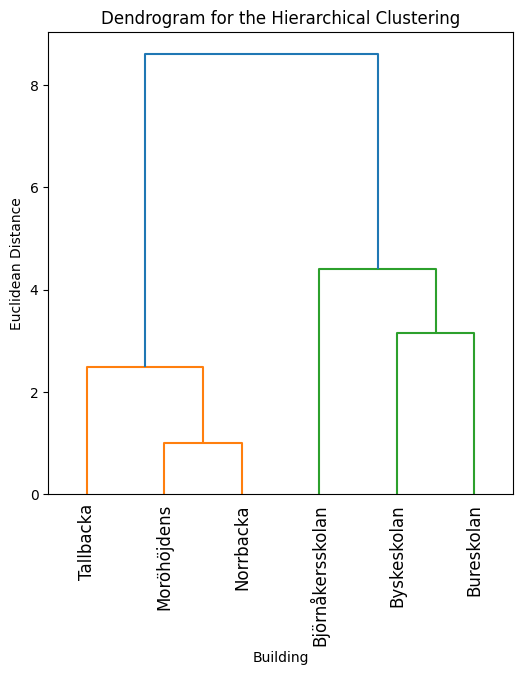

In [ ]:
# Generate the linkage matrix
Z = linkage(df_processed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(6, 6))
dendrogram(Z, labels=df.Building.values, leaf_rotation=90, leaf_font_size=12)
plt.title("Dendrogram for the Hierarchical Clustering")
plt.xlabel("Building")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
# Perform hierarchical clustering with the determined number of clusters
n_clusters = 2
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = cluster.fit_predict(df_processed)

# Display the resulting clusters
df[['Building', 'Cluster']].sort_values(by='Cluster')


,Building,Cluster
3,Byskeskolan,0
4,Bureskolan,0
5,Björnåkersskolan,0
0,Tallbacka,1
1,Moröhöjdens,1
2,Norrbacka,1


In [ ]:
columns = preprocessor.get_feature_names_out()
df_processed_df = pd.DataFrame(df_processed, columns=columns, index=df.index)

# Add cluster labels to the processed data
df_processed_df['Cluster'] = df['Cluster']

# Initialize a dictionary to store the centroid of each cluster
centroids = {}

# Calculate the centroid for each cluster
for i in range(n_clusters):
    centroids[i] = df_processed_df[df_processed_df['Cluster'] == i].mean(axis=0)

# Initialize a dictionary to store the most representative building of each cluster
representatives = {}

# Find the most representative building for each cluster
for i in range(n_clusters):
    # Drop the 'Cluster' column when calculating distances
    cluster_data = df_processed_df[df_processed_df['Cluster'] == i].drop('Cluster', axis=1)
    centroid = centroids[i].drop('Cluster')
    
    # Calculate the Euclidean distance from each building in the cluster to the centroid
    distances = cluster_data.apply(lambda x: np.linalg.norm(x - centroid), axis=1)
    
    # Identify the index of the minimum distance
    min_dist_index = distances.idxmin()
    
    # Store the most representative building's name
    representatives[i] = df.loc[min_dist_index, 'Building']

# Display the most representative building for each cluster
for cluster, building in representatives.items():
    print(f"Most representative building for Cluster {cluster}: {building}")


Most representative building for Cluster 0: Bureskolan
Most representative building for Cluster 1: Norrbacka


## K-Means

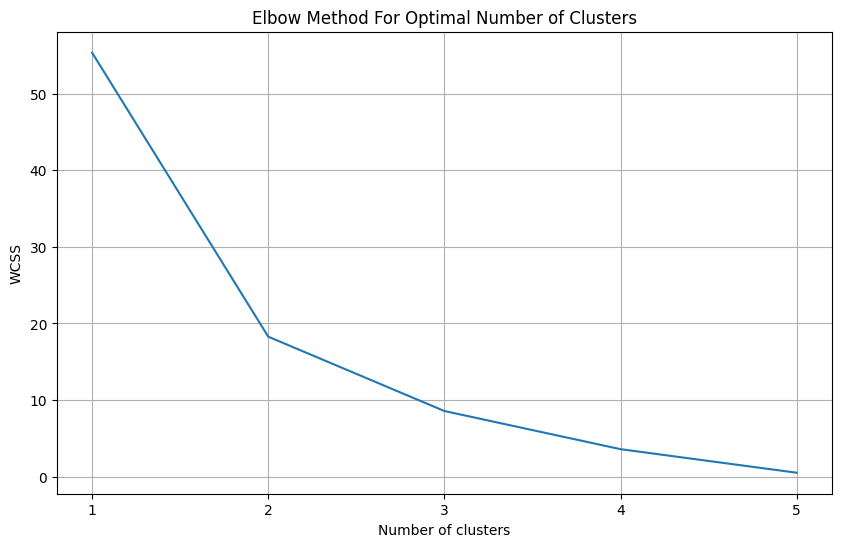

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters using the elbow method
wcss = []
max_range = min(len(df_processed), 10)  # Ensure max range does not exceed the number of samples

for i in range(1, max_range):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_processed)
    wcss.append(kmeans.inertia_)

# Now, both x and y will have compatible dimensions.
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_range), wcss)  # x-range matches the number of WCSS scores calculated
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_range))
plt.grid(True)
plt.show()

In [ ]:
# Perform K-means clustering with the chosen number of clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(df_processed)

# Display the resulting clusters along with the buildings
df[['Building', 'KMeans_Cluster']].sort_values(by='KMeans_Cluster')


,Building,KMeans_Cluster
3,Byskeskolan,0
4,Bureskolan,0
5,Björnåkersskolan,0
0,Tallbacka,1
1,Moröhöjdens,1
2,Norrbacka,1


## Clustering Time series with DTW

In [ ]:
!pip install dtaidistance==2.3.11


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 65.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import plotly.graph_objs as go

building_names = ['Björnåkerskolan', 'Bureskolan', 'Byskeskolan', 'Moröhöjdens', 'Norrbacka', 'Tallbacka']

# Create an interactive Plotly graph for each time series
time_series_consumption = [df['Förbrukning'] for df in [Björnåkerskolan_EL, Bureskolan_EL, Byskeskolan_EL, Moröhöjdens_EL, Norrbacka_EL, Tallbacka_EL]]

# Create an interactive Plotly graph for each time series
traces = []
for df, name in zip(time_series_consumption, building_names):
    traces.append(go.Scatter(
        x=df.index,  # This column should be converted to datetime if it's not already
        y=df,  # Or whatever the column name is for the consumption data
        mode='lines',
        name=name
    ))

layout = go.Layout(
    title='Electricity Consumption Time Series',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Electricity Consumption'),  # Update this if you normalize
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

/tmp/ipykernel_82/1981585192.py:12: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



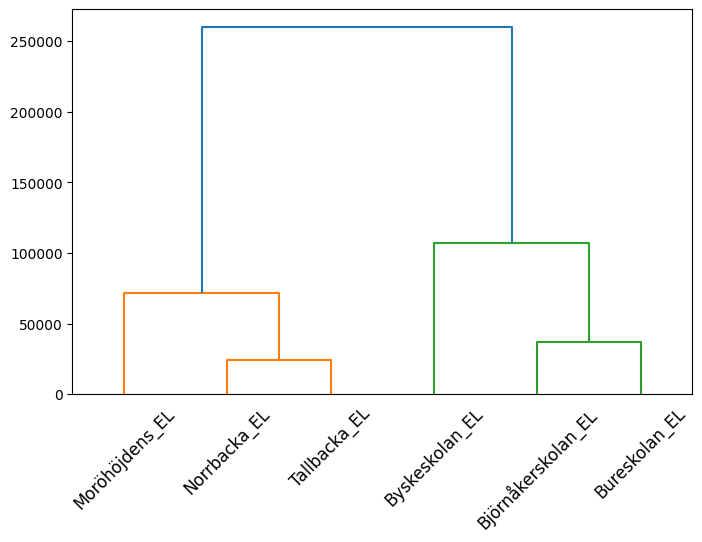

In [ ]:
from dtaidistance import dtw
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Defining the list of buildings corresponding to your time series
buildings = ['Björnåkerskolan_EL', 'Bureskolan_EL', 'Byskeskolan_EL', 'Moröhöjdens_EL', 'Norrbacka_EL', 'Tallbacka_EL']
time_series = [df['Förbrukning'].to_numpy() for df in [Björnåkerskolan_EL, Bureskolan_EL, Byskeskolan_EL, Moröhöjdens_EL, Norrbacka_EL, Tallbacka_EL]]
distance_matrix = dtw.distance_matrix_fast(time_series)

# Use linkage to perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram with building names
plt.figure(figsize=(8, 5))
dendrogram(Z, labels=buildings)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


In [ ]:
pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 34.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tslearn.clustering import silhouette_score

n_clusters = 2

cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
silhouette_score(distance_matrix, cluster_labels, metric="dtw")

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



0.5078382957444233

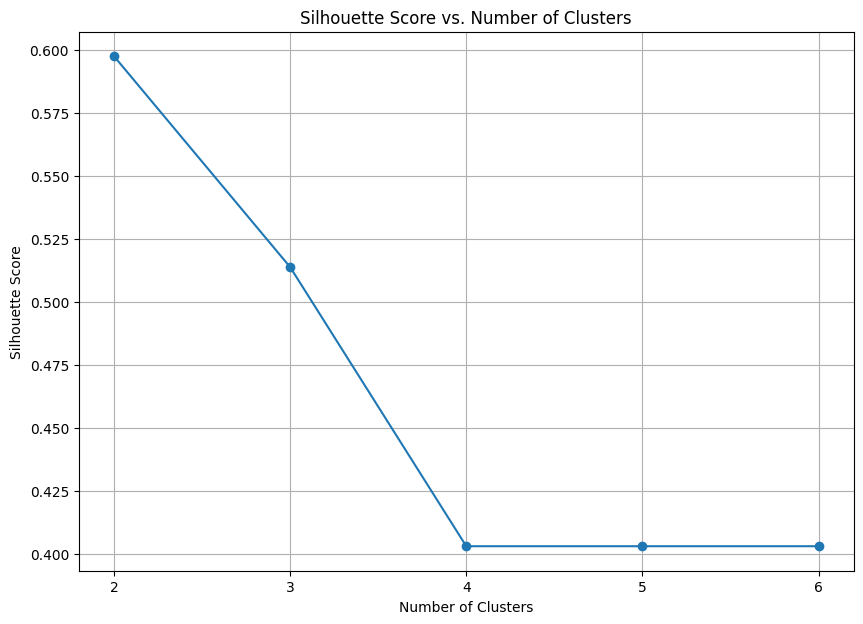

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.ticker as ticker

# Choose a maximum number of clusters to evaluate
max_clusters = 6
silhouette_scores = []

# Iterate over different numbers of clusters
for n_clusters in range(2, max_clusters + 1):
    # Perform clustering
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(distance_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')

# Set the x-axis to only show integer values (whole number of clusters)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)  # Optional: add grid for better readability
plt.show()



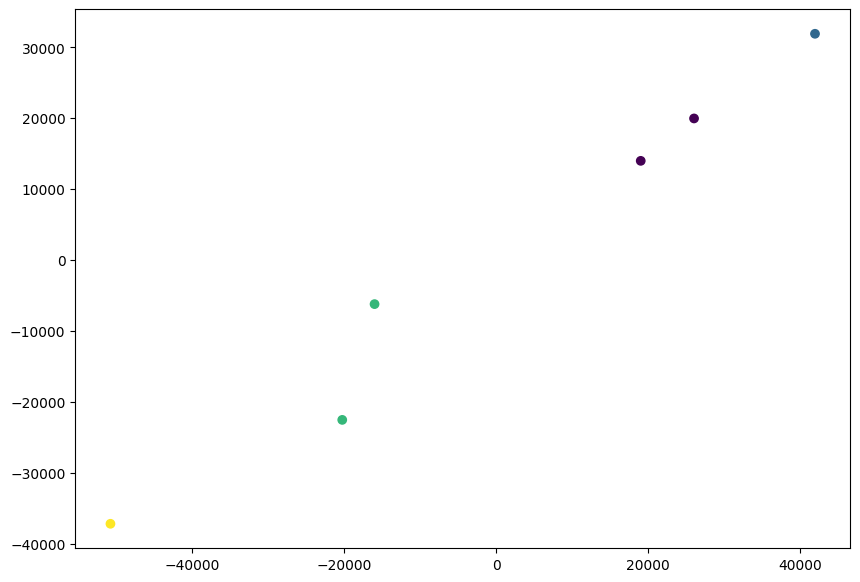

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
ts_reduced = mds.fit_transform(distance_matrix)

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(ts_reduced[:, 0], ts_reduced[:, 1], c=cluster_labels, cmap='viridis', marker='o')

# Display the plot
plt.show()

In [ ]:
# Assuming 'building_names' contains the names of the buildings in the order they appear in 'time_series'
building_names = ['Björnåkerskolan', 'Bureskolan', 'Byskeskolan', 'Moröhöjdens', 'Norrbacka', 'Tallbacka']

# Use a threshold or number of clusters based on your Elbow curve analysis
number_of_clusters = 2  # Around 2-4 according to elbow method
cluster_labels = fcluster(Z, number_of_clusters, criterion='maxclust')

# Initialize a dictionary to hold the names of buildings in each cluster
clusters = {i: [] for i in range(1, number_of_clusters + 1)}
for i, label in enumerate(cluster_labels):
    clusters[label].append(building_names[i])

# Calculate the lengths of each time series
time_series_lengths = [len(ts) for ts in time_series]

# Determine the most representative series in each cluster using normalized DTW distances
for cluster_number, building_list in clusters.items():
    print(f"Cluster {cluster_number} contains the following buildings: {building_list}")

    indices = [building_names.index(name) for name in building_list]
    if len(indices) == 1:
        print(f"The most representative building for Cluster {cluster_number} is {building_list[0]}")
        continue

    # Calculate normalized distances within the cluster
    normalized_distances = []
    for idx in indices:
        sum_distances = np.sum(distance_matrix[idx, indices])
        normalized_distance = sum_distances / time_series_lengths[idx]  # Normalizing by the length of the series
        normalized_distances.append(normalized_distance)

    # The series with the smallest normalized distance is the most representative
    most_representative_index = np.argmin(normalized_distances)
    most_representative_building = building_list[most_representative_index]
    
    print(f"The most representative building for Cluster {cluster_number} is {most_representative_building}")


Cluster 1 contains the following buildings: ['Moröhöjdens', 'Norrbacka', 'Tallbacka']
The most representative building for Cluster 1 is Norrbacka
Cluster 2 contains the following buildings: ['Björnåkerskolan', 'Bureskolan', 'Byskeskolan']
The most representative building for Cluster 2 is Bureskolan


In [ ]:
building_names = ['Björnåkerskolan', 'Bureskolan', 'Byskeskolan', 'Moröhöjdens', 'Norrbacka', 'Tallbacka']

# Use a threshold or number of clusters based on your Elbow curve analysis
number_of_clusters = 2  # Choose based on elbow method
cluster_labels = fcluster(Z, number_of_clusters, criterion='maxclust')

# Initialize a dictionary to hold the names of buildings in each cluster
clusters = {i: [] for i in range(1, number_of_clusters + 1)}
for i, label in enumerate(cluster_labels):
    clusters[label].append(building_names[i])

# Calculate the lengths of each time series
time_series_lengths = [len(ts) for ts in time_series]

# Determine the most representative series in each cluster and print normalized distances
for cluster_number, building_list in clusters.items():
    print(f"\nCluster {cluster_number} contains the following buildings: {building_list}")

    indices = [building_names.index(name) for name in building_list]
    if len(indices) == 1:
        print(f"The most representative (and only) building for Cluster {cluster_number} is {building_list[0]}")
        print(f"Normalized distance for {building_list[0]}: 0.0 (only building in the cluster)")
        continue

    normalized_distances = []
    for idx in indices:
        sum_distances = np.sum(distance_matrix[idx, indices])
        normalized_distance = sum_distances / time_series_lengths[idx]  # Normalizing by the length of the series
        normalized_distances.append(normalized_distance)

    most_representative_index = np.argmin(normalized_distances)
    most_representative_building = building_list[most_representative_index]
    
    print(f"The most representative building for Cluster {cluster_number} is {most_representative_building}")
    
    # Print normalized distances for each building
    for i, building in enumerate(building_list):
        print(f"Final normalized distance for {building}: {normalized_distances[i]}")



Cluster 1 contains the following buildings: ['Moröhöjdens', 'Norrbacka', 'Tallbacka']
The most representative building for Cluster 1 is Norrbacka
Final normalized distance for Moröhöjdens: 13.232299988179859
Final normalized distance for Norrbacka: 7.111175635463244
Final normalized distance for Tallbacka: 11.246708731344283

Cluster 2 contains the following buildings: ['Björnåkerskolan', 'Bureskolan', 'Byskeskolan']
The most representative building for Cluster 2 is Bureskolan
Final normalized distance for Björnåkerskolan: 13.147459673983283
Final normalized distance for Bureskolan: 11.04632567878155
Final normalized distance for Byskeskolan: 16.000013604420833


In [ ]:
import plotly.graph_objs as go

# Convert the numpy distance matrix to a list of lists, which Plotly can accept
distance_matrix_list = distance_matrix.tolist()

# Create heatmap
fig = go.Figure(data=go.Heatmap(
                    z=distance_matrix_list,
                    x=building_names,
                    y=building_names,
                    #colorscale='Viridis',
                    hoverongaps = False))

# Update layout for a more readable heatmap
fig.update_layout(
    title='DTW Distance Matrix',
    xaxis=dict(title='Buildings'),
    yaxis=dict(title='Buildings'),
    autosize=False,
    width=680,
    height=680,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

# Show the plot
fig.show()


In [ ]:
import plotly.figure_factory as ff

# You'll create heatmaps for each cluster to visualize the DTW distances
# and identify the medoid visually.

for cluster_number, building_list in clusters.items():
    print(f"Visualizing Cluster {cluster_number} with buildings: {building_list}")
    
    # Get the indices of the buildings in this cluster
    indices = [building_names.index(name) for name in building_list]

    # If there's only one building, no need for a heatmap
    if len(indices) == 1:
        print(f"Only one building in Cluster {cluster_number}, so it's the medoid by default.")
        continue

    # Get the submatrix of distances for buildings in this cluster
    submatrix = distance_matrix[np.ix_(indices, indices)]
    
    # Calculate the average distance to other points in the cluster and find the medoid
    avg_distances = submatrix.mean(axis=1)
    most_representative_index = np.argmin(avg_distances)

    # The building with the smallest average distance is the most representative
    most_representative_building = building_list[most_representative_index]

    # Create a heatmap for the submatrix
    fig = ff.create_annotated_heatmap(
        z=submatrix,
        x=[building_list[i] for i in range(len(indices))],  # Building names for columns
        y=[building_list[i] for i in range(len(indices))],  # Building names for rows
        annotation_text=np.around(submatrix, decimals=2),
        showscale=True,
        colorscale='Viridis'
    )

    # Update layout to add titles and adjust size if necessary
    fig.update_layout(
        title=f"DTW Distance Matrix for Cluster {cluster_number} - Medoid: {most_representative_building}",
        xaxis=dict(title='Buildings'),
        yaxis=dict(title='Buildings'),
        width=600,
        height=600
    )

    fig.show()


Visualizing Cluster 1 with buildings: ['Moröhöjdens', 'Norrbacka', 'Tallbacka']


Visualizing Cluster 2 with buildings: ['Björnåkerskolan', 'Bureskolan', 'Byskeskolan']


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75f8df25-ca83-430b-8bf0-875ff5982751' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>